In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import camb 
from numpy.fft import fftshift
from tqdm import tqdm

import lensit as li
from lensit.clusterlens import lensingmap, profile 
from lensit.misc.misc_utils import gauss_beam
from lensit.ffs_covs import ffs_cov, ell_mat
from plancklens.wigners import wigners
from plancklens import n0s, nhl
from plancklens.n1 import n1

import os
import os.path as op
import matplotlib as mpl
from matplotlib import pyplot as plt

from scipy.interpolate import UnivariateSpline as spline

In [2]:
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] = 8.5, 5.5

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('text', usetex=True)
mpl.rcParams['errorbar.capsize'] = 4
mpl.rc('legend', fontsize=15)

In [ ]:
k0_T_QE = np.loadtxt("./forecast_results/kappa_0_sims_QE_T.txt")
k0_T_MAP = np.l

In [3]:
con = np.loadtxt("./forecast_results/forecast_tt_pp_mv_ttit_ppit_mvit_lmax4k.txt")
inv_snr_qe_tt_lmin1000 = con[0]
inv_snr_qe_pp_lmin1000 = con[1]
inv_snr_qe_mv_lmin1000 = con[2]
inv_snr_qe_tt_lmin1000_it = con[3]
inv_snr_qe_pp_lmin1000_it = con[4]
inv_snr_qe_mv_lmin1000_it = con[5]

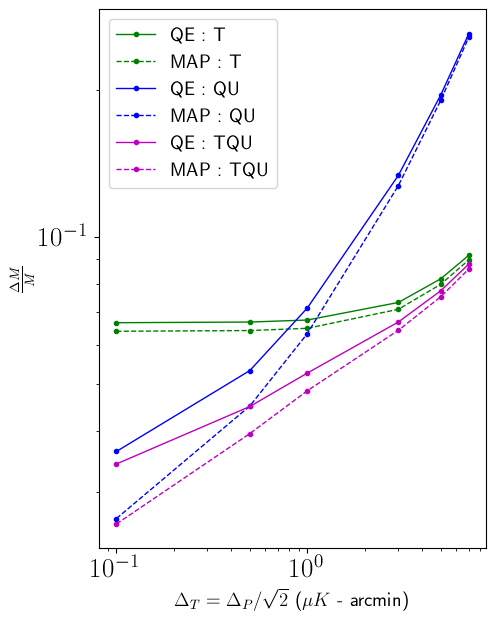

In [19]:
%matplotlib inline
nlev_t = np.array([0.1,0.5,1,3,5,7])
plt.figure(figsize=(5,7))
#add marker size
ms = 3
fact  = 10
plt.plot(nlev_t, inv_snr_qe_tt_lmin1000*fact, c="g", ls="-", marker='o', markersize=ms, lw=1, label="QE : T ")
plt.plot(nlev_t, inv_snr_qe_tt_lmin1000_it*fact, c="g", ls="--",marker='o', markersize=ms, lw=1, label=" MAP : T")

#plt.plot(nlev_t, inv_snr_qe_mv_lmin0, c="y", ls="-",marker='o', lw=2, label="QE MV with lmin0")
plt.plot(nlev_t, inv_snr_qe_pp_lmin1000*fact, c="b", ls="-",marker='o', markersize=ms, lw=1, label="QE : QU ")
plt.plot(nlev_t, inv_snr_qe_pp_lmin1000_it*fact, c="b", ls="--",marker='o', markersize=ms, lw=1, label="MAP : QU")
plt.plot(nlev_t, inv_snr_qe_mv_lmin1000*fact, c="m", ls="-",marker='o', markersize=ms, lw=1, label="QE : TQU")
#plt.plot(nlev_t, inv_snr_qe_mv_analft_lmin1000, c="orange", ls="-",marker='o', lw=2, label="QE MV with analFT with lmin1000")

plt.plot(nlev_t, inv_snr_qe_mv_lmin1000_it*fact, c="m", ls="--",marker='o', markersize=ms, lw=1, label="MAP : TQU")

ax = plt.gca()
#ax.set_xlim([0.05, 15])
#ax.set_ylim([0.0004, 0.1])
plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$\Delta_T = \Delta_P/\sqrt{2}$ ($\mu K$ - arcmin)", fontsize=14)
plt.ylabel(r"$\frac{\Delta M}{M}$", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
#plt.title("lmax_CMB = 4000, lmin_CMB=100", fontsize=14)
#plt.savefig("result_srini_lmaxcmb5k_lmincmb1k_iterative.png", transparent=True)
#plt.close()
#plt.show()

In [6]:
(0.279839-0.247299)/0.247299 *100

13.158160768947717